# Google Playstore Case Study

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Reading the Dataset

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the dataset

inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Checking the shape of the dataframe - inp0

inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values - Imputation, where you replace the missing value with another estimated value
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [4]:
# Checking the datatypes of all the columns of the dataframe

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [5]:
# Checking the number of null values in the columns

inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [6]:
# Droping the rows having null values in the Rating field

inp1 = inp0[~inp0.Rating.isnull()]

# Checking the shape of the dataframe again (there will descrease in the no. of rows)
inp1.shape

(9367, 13)

In [7]:
# Checking the number of nulls in the Rating field again to cross-verify

inp1.Rating.isnull().sum()

0

In [8]:
# Checking the number of nulls in the dataframe again and finding the total number
# of null values

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
# Inspecting the nulls in the Android Version column

inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
# Droping the row having shifted values (check above df, last row has mismatched wrt 
# col headers)

inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1['Category'] == '1.9'))]

# Checking the nulls again in Android version column to cross-verify

inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables using mean and median.
- For categorical variables using mode.

In [11]:
# Checking the most common value in the Android version column
android_ver_mode = inp1['Android Ver'].mode()[0]
android_ver_mode

# to check the frequency of the mode
len(inp1[inp1['Android Ver'] == android_ver_mode])

2059

In [12]:
# Filling up the nulls in the Android Version column with the
# above value(android_ver_mode)

inp1['Android Ver'] = inp1['Android Ver'].fillna(android_ver_mode)

In [13]:
# Checking the nulls in the Android version column again to cross-verify

inp1['Android Ver'].isnull().sum()

0

In [14]:
# Checking the nulls in the entire dataframe again

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [15]:
# Checking the most common value in the Current version column

current_ver_mode = inp1['Current Ver'].mode()[0]
current_ver_mode

'Varies with device'

In [16]:
# Replacing the nulls in the Current version column with the above value

inp1['Current Ver'] = inp1['Current Ver'].fillna(current_ver_mode)

In [17]:
# Checking the most common value in the Current version column again
inp1['Current Ver'].mode()[0]

'Varies with device'

#### Handling Incorrect Data Types 

In [18]:
# Checking the datatypes of all the columns 
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [19]:
# Calculating the average price of all apps having the Android version as "4.1 and up" 

# avg_price = inp1[inp1['Android Ver'] == '4.1 and up'].Price.sum() / (len(inp1[inp1['Android Ver'] == '4.1 and up']))
# avg_price

Uncomment the above cell and run.
It will result in error sue to the incorrect data type of the price col.
Let's analyse and fix it.

In [20]:
# Analyse the Price column to check the issue

inp1['Price'].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [21]:
# Updating the price column

inp1['Price'] = inp1['Price'].map(lambda x: float(x) if x == '0' else float(x[1:]))
inp1['Price'].value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [22]:
# Verifying the dtype of Price once again

inp1['Price'].dtype

dtype('float64')

In [23]:
# Analysing the Reviews column

inp1['Reviews'].value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [24]:
# Changing the dtype of this column
inp1['Reviews'] = inp1['Reviews'].map(lambda x: int(x))

# better way to do it is as follows:
inp1['Reviews'] = inp1['Reviews'].astype('int32')

# Checking the quantitative spread of this dataframe
inp1['Reviews'].describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [25]:
# Analysing the Installs Column

inp1['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [26]:
# Cleaning the Installs Column and finding the approximate number of apps
# at the 50th percentile.

inp1['Installs'] = inp1['Installs'].map(lambda x: int(''.join(x[:-1].split(','))))
inp1['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [27]:
# Performing the sanity checks on the Reviews column
inp1['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [28]:
# checking reviews > installs count
inp1[(inp1.Reviews > inp1.Installs)]

# dropping rows which have count of reviews > installs
inp1 = inp1[inp1['Reviews'] <= inp1['Installs']]
inp1.shape

(9359, 13)

In [29]:
# performing the sanity checks on prices of free apps 
inp1[(inp1.Type == 'Free') & (inp1.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Outliers Analysis Using Boxplot

Now, we need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where we will start utilising visualisation and the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

In [30]:
# price col

inp1['Price'].value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

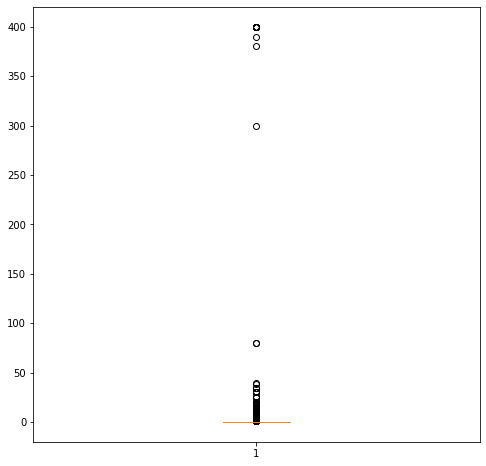

In [31]:
# Creating a box plot for the price column

fig = plt.figure(figsize=(8,8))
plt.boxplot(inp1['Price'])
plt.show()

In [32]:
# Checking the apps with price more than 200
inp1[(inp1.Price > 200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [33]:
# Cleaning the Price column
# (the apps scam app and adds no value in analysis observe above df)

inp1 = inp1[(inp1['Price']<200)]
inp1['Price'].describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

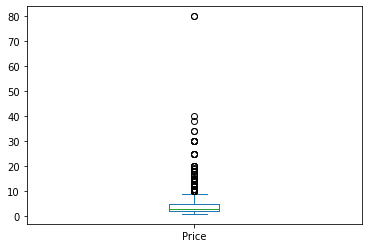

In [34]:
# Creating a box plot for paid apps

inp1[inp1.Price > 0].Price.plot.box()
plt.show()

In [35]:
# Checking the apps with price more than 30
inp1[inp1['Price'] > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [36]:
# Cleaning the Price column again

inp1 = inp1[inp1['Price'] <= 30]
inp1.shape

(9338, 13)

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


You can adjust the number of bins to improve its granularity

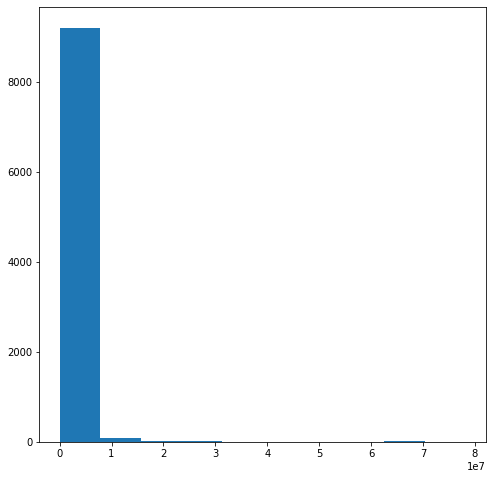

In [37]:
# Creating a histogram of the Reviews

fig = plt.figure(figsize=(8,8))
plt.hist(inp1['Reviews'])
plt.show()

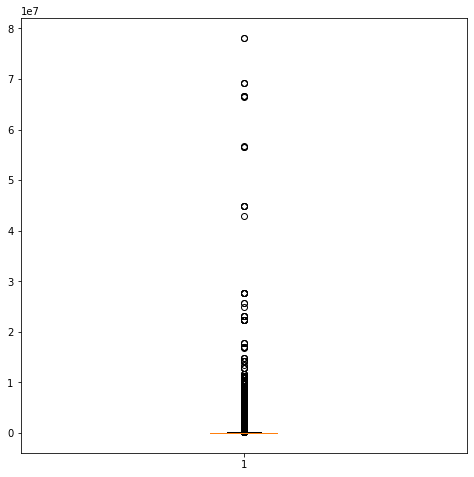

In [38]:
# box plot

fig = plt.figure(figsize=(8, 8))
plt.boxplot(inp1['Reviews'])
plt.show()

In [39]:
# Checking records with 1 million reviews

inp1[inp1['Reviews'] >= 10**6]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


In [40]:
# droping the above rows

inp1 = inp1[inp1['Reviews'] <= 10**6]

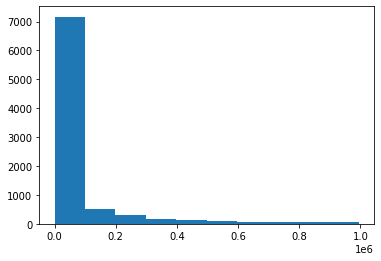

In [41]:
# Creating a histogram again for reviews and checking the peaks

plt.hist(inp1['Reviews'])
plt.show()

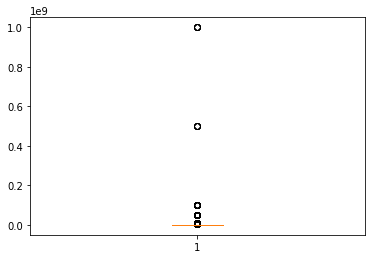

In [42]:
# Creating a box plot for the Installs column and report back the IQR


plt.boxplot(inp1['Installs'])
plt.show()

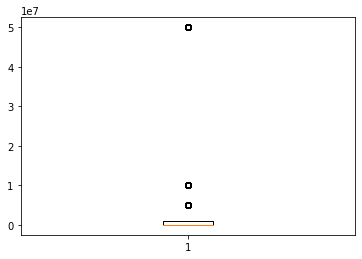

In [43]:
# Cleaning the Installs by removing all the apps having more than or equal to 100 million installs

inp1 = inp1[inp1['Installs'] < 10 ** 8]
plt.boxplot(inp1['Installs'])
plt.show()

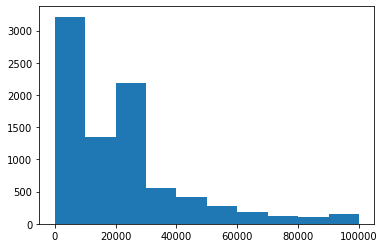

In [44]:
# Ploting a histogram for Size as well.

plt.hist(inp1['Size'])
plt.show()

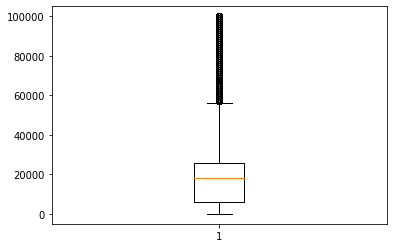

count      8573.000000
mean      21625.064264
std       20712.753555
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

In [45]:
# Creating a boxplot for the Size column and report back the median value

plt.boxplot(inp1['Size'])
plt.show()
inp1['Size'].describe()

### Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [46]:
# importing the necessary libraries

import seaborn as sns

#### Distribution Plots

<Figure size 576x576 with 0 Axes>

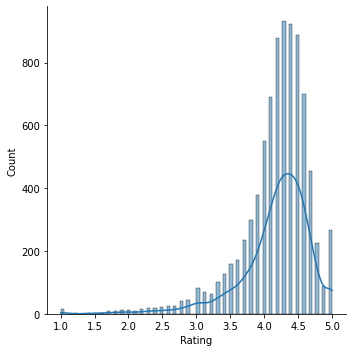

In [47]:
# Creating a distribution plot for rating
# kde=True plots the distribution curve line too

plt.figure(figsize=(8,8))
sns.displot(inp1['Rating'], kde=True)
plt.show()

<Figure size 576x576 with 0 Axes>

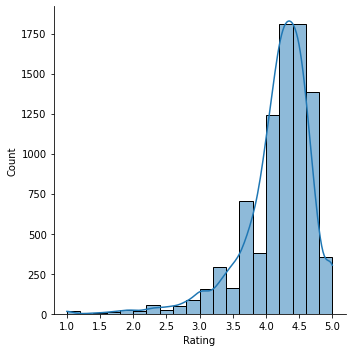

In [48]:
# Changing the number of bins

fig = plt.figure(figsize=(8,8))
sns.displot(inp1['Rating'], bins=20, kde=True)
plt.show()

<Figure size 576x576 with 0 Axes>

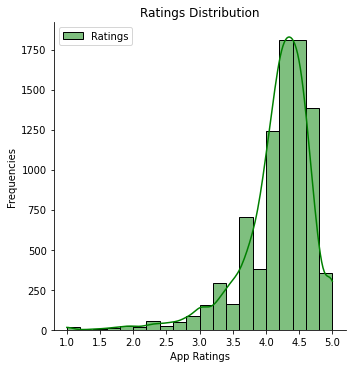

In [49]:
# Changing the colour of bins to green

fig = plt.figure(figsize=(8,8))
sns.displot(inp1['Rating'], bins=20, kde=True, color='g', label='Ratings')
plt.title('Ratings Distribution')
plt.xlabel('App Ratings')
plt.ylabel('Frequencies')
plt.legend()
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable we utilise either a pie chart or a box plot

In [50]:
# Analysing the Content Rating column

inp1['Content Rating'].value_counts()
inp1.shape

(8573, 13)

In [51]:
# Removing the rows with values which are less represented

inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+', 'Unrated'])]

In [52]:
# Resetting the index

inp1.reset_index(inplace=True, drop=True)
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8569 entries, 0 to 8568
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8569 non-null   object 
 1   Category        8569 non-null   object 
 2   Rating          8569 non-null   float64
 3   Reviews         8569 non-null   int32  
 4   Size            8569 non-null   float64
 5   Installs        8569 non-null   int64  
 6   Type            8569 non-null   object 
 7   Price           8569 non-null   float64
 8   Content Rating  8569 non-null   object 
 9   Genres          8569 non-null   object 
 10  Last Updated    8569 non-null   object 
 11  Current Ver     8569 non-null   object 
 12  Android Ver     8569 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 836.9+ KB


In [53]:
# Checking the apps belonging to different categories of Content Rating 

inp1['Content Rating'].value_counts()

Everyone        6898
Teen             918
Mature 17+       417
Everyone 10+     336
Name: Content Rating, dtype: int64

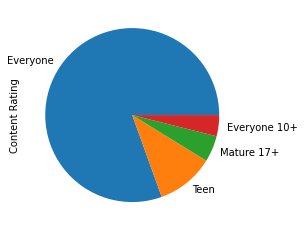

In [54]:
# Plotting a pie chart
# plotting through pandas pie

inp1['Content Rating'].value_counts().plot.pie()
plt.show()

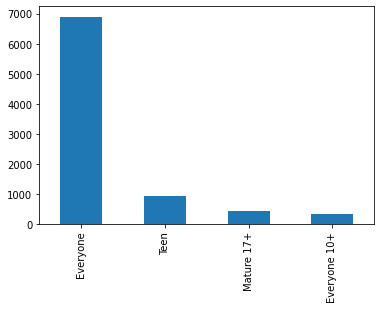

In [55]:
# Plotting a bar chart

inp1['Content Rating'].value_counts().plot.bar()
plt.show()

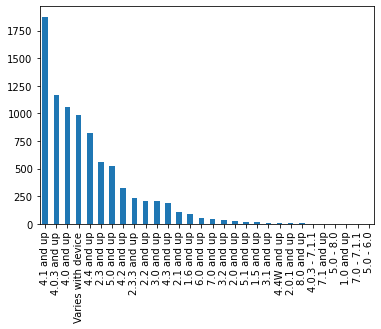

In [56]:
# Plotting a bar plot for checking the 4th highest Android version type

inp1['Android Ver'].value_counts().plot.bar()
plt.show()

#### Scatter Plots

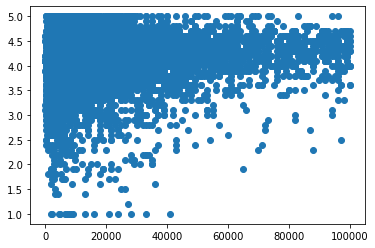

In [57]:
# size vs Rating

# Plotting a scatter-plot in the matplotlib way between Size and Rating

plt.scatter(inp1['Size'], inp1['Rating'])
plt.show()

<Figure size 720x720 with 0 Axes>

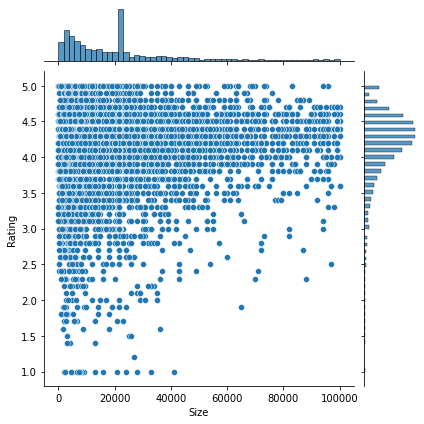

In [58]:
# Plotting the same thing now using jointplot

fig = plt.figure(figsize=(10,10))
sns.jointplot(x=inp1.Size, y=inp1.Rating)
plt.show()

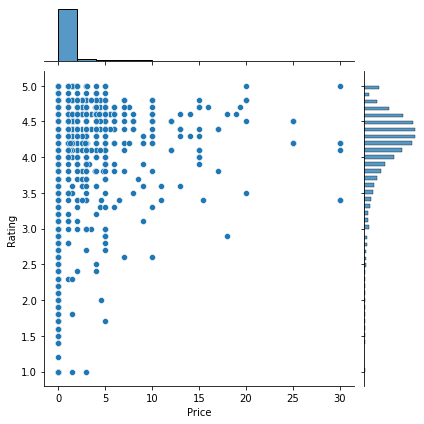

In [59]:
# Plotting a jointplot for Price and Rating

sns.jointplot(data=inp1, x='Price', y='Rating')
plt.show()

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

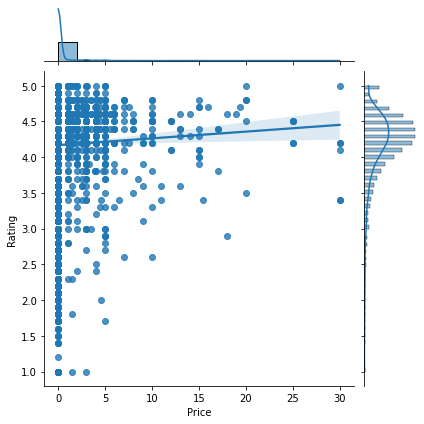

In [60]:
# Plotting a reg plot for Price and Rating and observe the trend

sns.jointplot(data=inp1, x='Price', y='Rating', kind='reg')
plt.show()

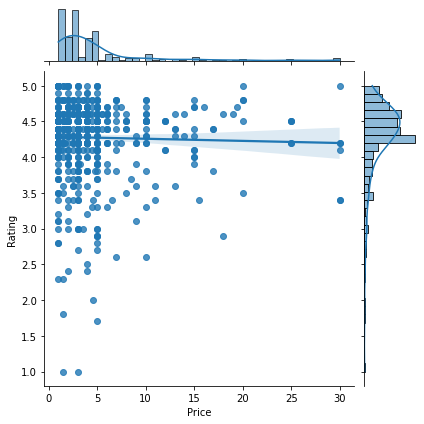

In [61]:
# Plotting a reg plot for Price and Rating again for only the paid apps.

paid_apps = inp1[inp1['Price'] > 0]
sns.jointplot(data=paid_apps, x='Price', y='Rating', kind='reg')
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

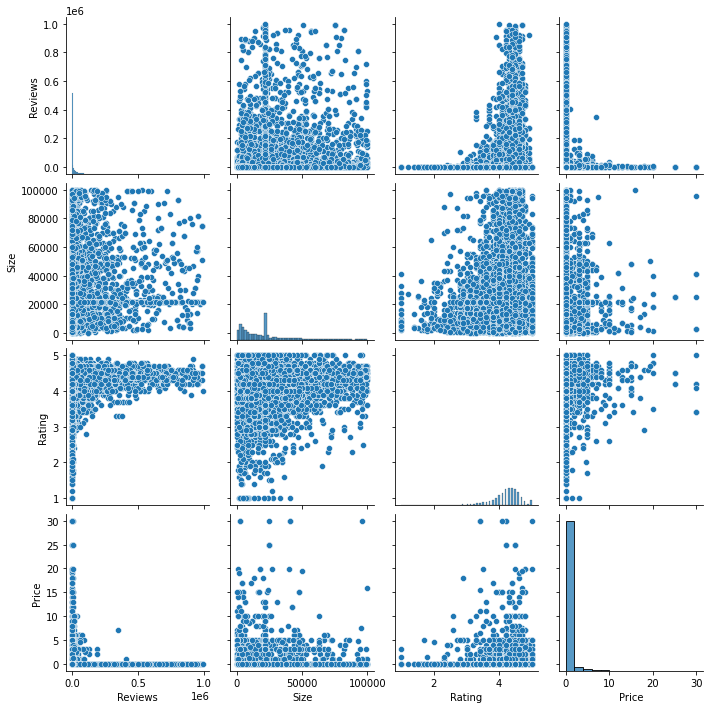

In [92]:
# Creating a pair plot for Reviews, Size, Price and Rating

sns.pairplot(inp1[['Reviews', 'Size', 'Rating', 'Price']])
plt.show()

#### Bar Charts Revisited

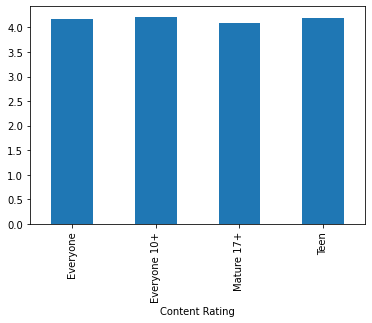

In [91]:
# Plotting a bar plot of Content Rating vs Average Rating 

inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

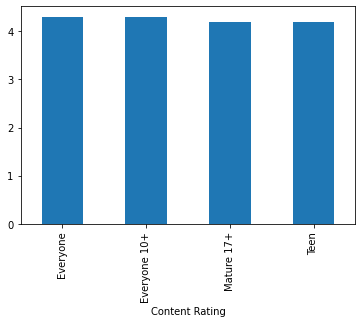

In [93]:
# Plotting the bar plot again with Median Rating

inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

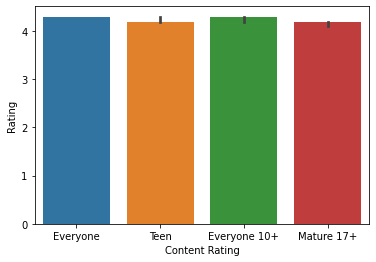

In [94]:
# Plotting the above bar plot using the estimator parameter
# using seaborn

sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=np.median)

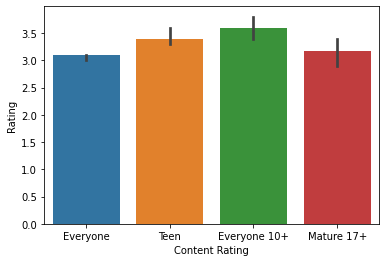

In [95]:
# Plotting the bar plot with only the 5th percentile of Ratings

sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=lambda z: np.quantile(z, 0.05))
plt.show()

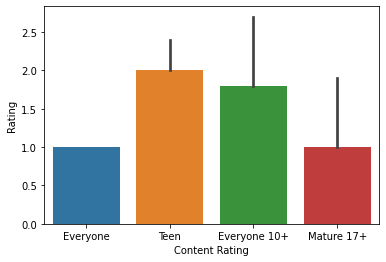

In [96]:
# Plotingt the bar plot with the minimum Rating

# for estimator np.min can be used but I have used quantile1

sns.barplot(data=inp1, x='Content Rating', y='Rating', estimator=lambda z: np.quantile(z, 0.00))
plt.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories

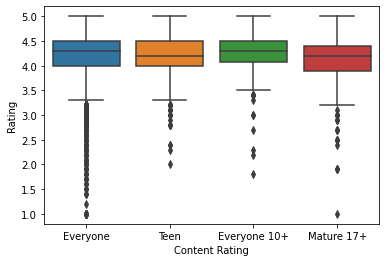

In [97]:
# Plotting a box plot of Rating vs Content Rating

sns.boxplot(data=inp1, x='Content Rating', y='Rating')
plt.show()

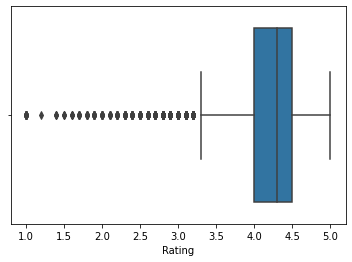

In [98]:
# Plotting a box plot for the Rating column only

sns.boxplot(x=inp1['Rating'])
plt.show()

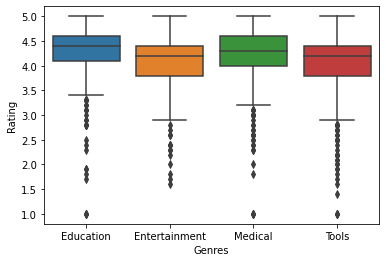

In [70]:
# Plotting a box plot of Ratings across the 4 most popular Genres

four_genr = inp1['Genres'].value_counts()[:4]
# top 4 grenres
four_genr

cols = ['Tools', 'Entertainment', 'Medical', 'Education']
inp5 = inp1[inp1['Genres'].isin(cols)]

# all the rows withn this 4 genres
inp5
sns.boxplot(x=inp5['Genres'], y=inp1['Rating'])
plt.show()

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values.

In [99]:
# Ratings vs Size vs Content Rating

# Preparing buckets for the Size column using pd.qcut
# qcut - quantile based cut

inp1['Size_Bucket'] = pd.qcut(inp1['Size'], [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL', 'L', 'M', 'H', 'VH'])
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket,updated_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,VL,6
8565,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,VH,7
8566,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,VL,7
8567,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,M,1


In [100]:
# Creating a pivot table for Size_buckets and Content Rating with values set to Rating.

pd.pivot_table(data=inp1, index='Content Rating', columns='Size_Bucket', values='Rating')

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.116677,4.158290,4.215450,4.170994,4.187102
Everyone 10+,4.188889,4.207143,4.238318,4.193443,4.216393
Mature 17+,3.951429,4.129592,4.021705,4.155172,4.193814
Teen,4.220213,4.208511,4.141637,4.198131,4.246102


In [101]:
# Changing the aggregation to median (by default it is mean)

pd.pivot_table(data=inp1, index='Content Rating', columns='Size_Bucket', values='Rating', aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.3,4.3
Everyone 10+,4.1,4.3,4.3,4.3,4.3
Mature 17+,4.2,4.2,4.1,4.1,4.2
Teen,4.3,4.3,4.2,4.2,4.3


In [102]:
# Changing the aggregation to 20th percentile
pd.pivot_table(data=inp1, index='Content Rating', columns='Size_Bucket', values='Rating', aggfunc=lambda z: np.quantile(z, 0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.84,3.94,4.1,4.0,4.0
Mature 17+,3.28,3.64,3.7,3.9,4.0
Teen,3.86,3.80,3.9,4.0,4.0


In [103]:
# Storing the pivot table in a separate variable

size_20_q = pd.pivot_table(data=inp1, index='Content Rating', columns='Size_Bucket', values='Rating', aggfunc=lambda z: np.quantile(z, 0.2))

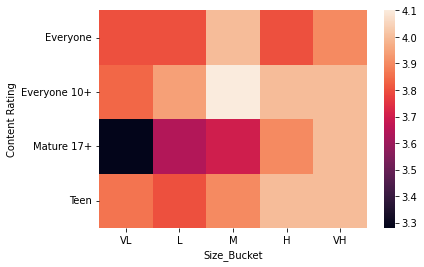

In [104]:
# Plotting a heat map

sns.heatmap(size_20_q)
plt.show()

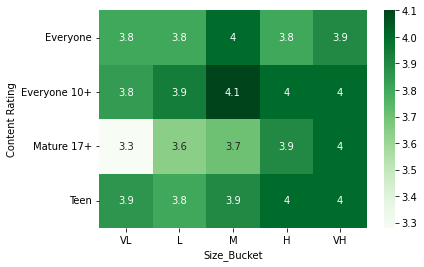

In [105]:
# Applying customisations

sns.heatmap(size_20_q, cmap='Greens', annot=True)
plt.show()

Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.

In [106]:
# Extracting the month from the Last Updated Date

inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month

In [107]:
# Finding the average Rating across all the months

inp1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.145050
2     4.090385
3     4.107963
4     4.148326
5     4.153894
6     4.172865
7     4.222399
8     4.270607
9     4.041406
10    4.012739
11    4.102020
12    4.064939
Name: Rating, dtype: float64

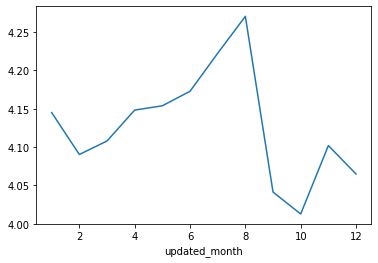

In [108]:
# Plotting a line graph

inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category.

In [109]:
## Creating a pivot table for Content Rating and updated Month with the values set to Installs

pd.pivot_table(data=inp1, index='updated_month', columns='Content Rating', values='Installs', aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,725387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1461067800,118173500,50140100,202689600
6,2127170505,217727100,145257200,415716600
7,6371109680,456556000,419491910,1143556800
8,4430943320,215821000,312981700,1057855650
9,260340410,24931100,2201010,22483100


In [110]:
# Storing the table in a separate variable

cr_pivot_t = pd.pivot_table(data=inp1, index='updated_month', columns='Content Rating', values='Installs', aggfunc=sum)
cr_pivot_t

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,725387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1461067800,118173500,50140100,202689600
6,2127170505,217727100,145257200,415716600
7,6371109680,456556000,419491910,1143556800
8,4430943320,215821000,312981700,1057855650
9,260340410,24931100,2201010,22483100


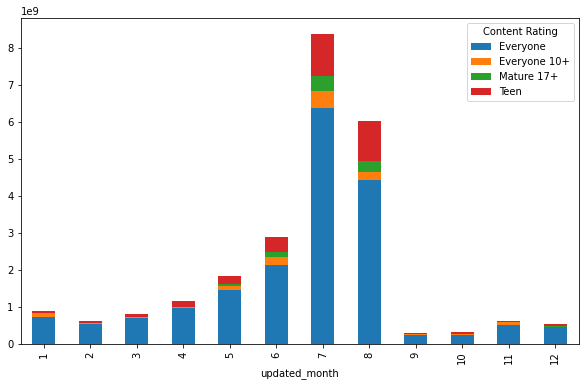

In [111]:
# Plotting the stacked bar chart

cr_pivot_t.plot(kind='bar', stacked='True', figsize=[10,6])
plt.show()

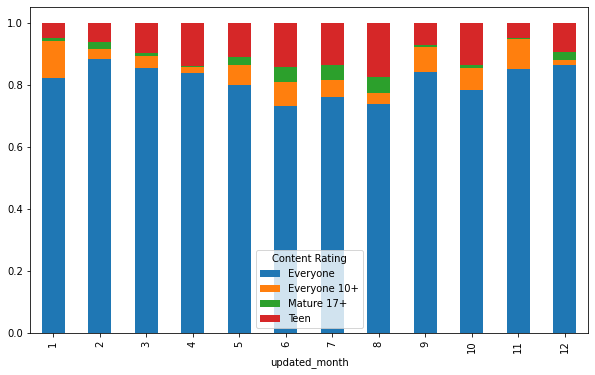

In [112]:
# Plotting the stacked bar chart again wrt to the proportions.

monthly_perc = cr_pivot_t[['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen']].apply(lambda x: x/x.sum(), axis=1)
monthly_perc.plot(kind='bar', stacked='True', figsize=[10,6])

plt.show()

### **Summary of case study**:

- First, we did a fair bit of data handling and cleaning - cleaning junk records, adding missing values, changing data types, remove outliers, etc.
- When we analysed the ratings using the histogram, we saw that they are skewed towards higher ratings.
- Using a bar chart, we saw that most of the apps belong to the Everyone category.
- We also observed a weak trend between the ratings and the size of the app, using a scatter-plot.
- Using a pair-plot, we were able to see multiple scatter plots and draw several inferences, for example, price and rating having very weak trend, reviews and price being inversely related and so on.
- After that, we utilised estimator functions along with bar plots as well as box plots to observe the spread of ratings across the different Content Rating Categories. Here, our main observation was that Everyone category has a lot of apps having very low ratings.
- Finally, we created a heat map comparing the ratings across different Reviews and Content Rating buckets.

#### Plotly

Plotly is a Python library used for creating interactive visual charts.
It is used to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/